In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import numpy_financial as npf
from pandas import ExcelWriter

import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

CABECERA_MES="MES "
NUM_MESES=92


converters = {'CONCEPTO' : str, 'GRUPO' : str, 'ELEMENTO' : str}
data = pd.read_csv('C://Users//angel//sensibilidad//data//Viabilidad88manteniendo+2plESEDecimales.csv', 
                   sep=';', decimal=',', converters=converters, encoding='ANSI')

data=data.astype({'CONCEPTO': 'string', 'GRUPO': 'string','ELEMENTO': 'string'})
data=data.fillna(value=0)
data = data.set_index('ELEMENTO')

In [2]:
ajusteValorPrestamoLargo=372910
ajusteValorPrestamoCorto=165698.28
## Podría venir cargado de la matriz. Tal cual se ha cambiado,  Aclarar si esto es Valor, Valor Calculado o que.
data.loc['Intereses prestamo largo', 'VALOR CALCULADO']=-ajusteValorPrestamoLargo
data.loc['Intereses prestamo corto', 'VALOR CALCULADO']=-ajusteValorPrestamoCorto

data.loc['Intereses prestamo largo', 'VALOR']=ajusteValorPrestamoLargo
data.loc['Intereses prestamo corto', 'VALOR']=ajusteValorPrestamoCorto


##Columnas VALOR elemento, elementosDependientes
matrizValorElementosDependientesDeValorCalculado_ORDEN2=[
                ['IVA', ['Informes previos', 'Topografia', 'Geotecnico']],
                ['Proyecto demolición', ['Demolición']],
                ['D.O. demolición', ['Demolición']],
                ['CSSE_1', ['Demolición']],
                ['Proyecto nueva ejecución', ['Vivienda', 'Rehabilitación']],
                ['D.O. nueva ejecución', ['Vivienda', 'Rehabilitación']],
                ['CSSE_2', ['Vivienda', 'Rehabilitación']],
                ['Gestión- Project Management', ['Demolición','Vivienda', 'Rehabilitación']],
                ['OCT', ['Vivienda', 'Rehabilitación']],
                ['Derribo', ['Demolición']],    
                ['Nueva edificacion', ['Vivienda', 'Rehabilitación']],
                ['LICENCIA nueva ejecución', ['Vivienda', 'Rehabilitación']],
                ['LICENCIA derribo', ['Demolición']],
                ['Notaria_1', ['Vivienda']],
                ['Registro_1', ['Vivienda']],
                ['Notaria_2', ['Vivienda']],
                ['Registro_2', ['Vivienda']],
                ['Seguro decenal', ['Vivienda']],            
            ]

matrizValorElementosDependientesDeValorCalculado_ORDEN3=[
                ['Impuestos - Sobre proyecto, D.O. Demolición y C.S.S.E.', ['Proyecto demolición', 'D.O. demolición', 'CSSE_1']],
                ['Impuestos - Sobre proyecto, D.O. Nueva Ejecución, C.S.S.E y PM', ['Proyecto nueva ejecución', 'D.O. nueva ejecución', 'CSSE_2', 'Gestión- Project Management']],
            ]

matrizValorElementosDependientesDeImportesTotalesCostes_ORDEN5=[
                ['AJD_3'],
                ['Constitución prestamo'],
                ['Banco comisión apertura'],
                ['Intereses prestamo corto'],
                ['Comisión cancelación']
]

## MESES
## elemento, coeficientes, resultados
matrizMesesElementosIndependientes=[['Informes previos', [1], ['MES 2']],
                 ['Topografia', [1], ['MES 4']],
                 ['Geotecnico', [1], ['MES 4']],
                 ['Proyecto demolición', [1], ['MES 6']],
                 ['D.O. demolición', [0.3, 0.7], ['MES 17','MES 18']],
                 ['CSSE_1', [0.5, 0.5], ['MES 17','MES 18']],
                 ['Proyecto nueva ejecución', [0.4, 0.6], ['MES 6','MES 9']],
                 ['D.O. nueva ejecución', 
                      [0.0714285714285714, 0.0714285714285714, 0.0714285714285714, 0.0714285714285714, 0.0714285714285714, 0.0714285714285714, 0.0714285714285714, 0.0714285714285714, 0.0714285714285714, 0.0714285714285714, 0.0714285714285714, 0.0714285714285714, 0.0714285714285714, 0.0714285714285714], 
                      ['MES 19','MES 20','MES 21','MES 22','MES 23','MES 24','MES 25','MES 26','MES 27','MES 28','MES 29','MES 30','MES 31','MES 32']
                 ],
                 ['CSSE_2', 
                      [0.0714285714285714, 0.0714285714285714, 0.0714285714285714, 0.0714285714285714, 0.0714285714285714, 0.0714285714285714, 0.0714285714285714, 0.0714285714285714, 0.0714285714285714, 0.0714285714285714, 0.0714285714285714, 0.0714285714285714, 0.0714285714285714, 0.0714285714285714], 
                      ['MES 19','MES 20','MES 21','MES 22','MES 23','MES 24','MES 25','MES 26','MES 27','MES 28','MES 29','MES 30','MES 31','MES 32']
                 ],
                 ['Gestión- Project Management', 
                      [0.05, 0.15, 0.05, 0.04, 0.04, 0.04, 0.04, 0.04, 0.04, 0.04, 0.04,0.04, 0.04, 0.04, 0.04, 0.04, 0.04, 0.04, 0.04, 0.11], 
                      ['MES 4','MES 9','MES 11','MES 17','MES 18','MES 19','MES 20','MES 21','MES 22','MES 23','MES 24','MES 25','MES 26','MES 27','MES 28','MES 29','MES 30','MES 31','MES 32','MES 33']
                 ],
                 ['OCT', 
                      [0.0714285714285714, 0.0714285714285714, 0.0714285714285714, 0.0714285714285714, 0.0714285714285714, 0.0714285714285714, 0.0714285714285714, 0.0714285714285714, 0.0714285714285714, 0.0714285714285714, 0.0714285714285714, 0.0714285714285714, 0.0714285714285714, 0.0714285714285714], 
                      ['MES 19','MES 20','MES 21','MES 22','MES 23','MES 24','MES 25','MES 26','MES 27','MES 28','MES 29','MES 30','MES 31','MES 32']
                 ],                 
                 ['Demolición', [0.4, 0.6], ['MES 17','MES 18']],
                 ['Gestión residuo-canon', [0.4, 0.6], ['MES 17','MES 18']],
                 ['Vivienda', [0.03, 0.04, 0.093, 0.105, 0.165, 0.205, 0.208, 0.082, 0.072], ['MES 24','MES 25','MES 26','MES 27','MES 28','MES 29','MES 30','MES 31','MES 32']],
                 ['Rehabilitación', [0.006, 0.016, 0.04, 0.0375, 0.045, 0.0945, 0.1175, 0.08, 0.133, 0.119, 0.1485, 0.0585, 0.1045], ['MES 19','MES 20','MES 21','MES 22','MES 23','MES 24','MES 25','MES 26','MES 27','MES 28','MES 29','MES 30','MES 31']],
                 ['Legalizaciones-OCA', [1], ['MES 32']], 
                 ['LICENCIA nueva ejecución', [0.2, 0.8], ['MES 10','MES 13']],
                 ['LICENCIA derribo', [0.2, 0.8], ['MES 7','MES 9']],
                 ['Notaria_1', [1], ['MES 33']],
                 ['Registro_1', [1], ['MES 33']],
                 ['AJD_1', [1], ['MES 33']],
                 ['Notaria_2', [1], ['MES 33']],
                 ['Registro_2', [1], ['MES 33']],
                 ['AJD_2', [1], ['MES 33']],
                  
                 ['Seguro decenal', 
                      [0.0625, 0.0625, 0.0625, 0.0625, 0.0625, 0.0625, 0.0625, 0.0625, 0.0625, 0.0625, 0.0625, 0.0625, 0.0625, 0.0625, 0.0625, 0.0625], 
                      ['MES 17', 'MES 18', 'MES 19','MES 20','MES 21','MES 22','MES 23','MES 24','MES 25','MES 26','MES 27','MES 28','MES 29','MES 30','MES 31','MES 32']
                 ],
                 ['Tasación (44 nuevas viviendas)', [1], ['MES 33']],
                 ['Notaria prestamo', [1], ['MES 16']],
                 ['AJD_3', [1], ['MES 16']],
                 ['Registro prestamo', [1], ['MES 16']],
                 ['Constitución prestamo', [1], ['MES 16']],
                 ['Banco comisión apertura', [1], ['MES 16']],
                 ['Comisión cancelación', [1], ['MES 92']],

                 ['Mes alquiler', 
                      [0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125], 
                      ['MES 18', 'MES 19','MES 20','MES 21','MES 22','MES 23','MES 24','MES 25']
                 ],
                 ['Alquiler guardamuebles', 
                      [0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125], 
                      ['MES 18', 'MES 19','MES 20','MES 21','MES 22','MES 23','MES 24','MES 25']
                 ],
                 ['Venta 44 viviendas', [1], ['MES 92']],
                 ['Ayudas a 88 viviendas Ayto', [1], ['MES 33']],
                 ['Ayudas a 88 viviendas DGA', [1], ['MES 33']],

                 ['Alquiler 44 viviendas 5 años', 
                      [0.01666667, 0.01666667,0.01666667,0.01666667,0.01666667,0.01666667,0.01666667,0.01666667,0.01666667,0.01666667,0.01666667,0.01666667,0.01666667,0.01666667,0.01666667,0.01666667,0.01666667,0.01666667,0.01666667,0.01666667,0.01666667,0.01666667,0.01666667,0.01666667,0.01666667,0.01666667,0.01666667,0.01666667,0.01666667,0.01666667,0.01666667,0.01666667,0.01666667,0.01666667,0.01666667,0.01666667,0.01666667,0.01666667,0.01666667,0.01666667,0.01666667,0.01666667,0.01666667,0.01666667,0.01666667,0.01666667,0.01666667,0.01666667,0.01666667,0.01666667,0.01666667,0.01666667,0.01666667,0.01666667,0.01666667,0.01666667,0.01666667,0.01666667,0.01666667,0.01666667], 
                      ['MES 33', 'MES 34', 'MES 35','MES 36','MES 37','MES 38','MES 39','MES 40','MES 41','MES 42','MES 43','MES 44','MES 45','MES 46','MES 47','MES 48','MES 49','MES 50','MES 51','MES 52','MES 53','MES 54','MES 55','MES 56','MES 57','MES 58','MES 59','MES 60','MES 61','MES 62','MES 63','MES 64','MES 65','MES 66','MES 67','MES 68','MES 69','MES 70','MES 71','MES 72','MES 73','MES 74','MES 75','MES 76','MES 77','MES 78','MES 79','MES 80','MES 81','MES 82','MES 83','MES 84','MES 85','MES 86','MES 87','MES 88','MES 89','MES 90','MES 91','MES 92']
                 ],
                 ['Capitalizacion ahorro energetico', 
                      [0.01666667, 0.01666667,0.01666667,0.01666667,0.01666667,0.01666667,0.01666667,0.01666667,0.01666667,0.01666667,0.01666667,0.01666667,0.01666667,0.01666667,0.01666667,0.01666667,0.01666667,0.01666667,0.01666667,0.01666667,0.01666667,0.01666667,0.01666667,0.01666667,0.01666667,0.01666667,0.01666667,0.01666667,0.01666667,0.01666667,0.01666667,0.01666667,0.01666667,0.01666667,0.01666667,0.01666667,0.01666667,0.01666667,0.01666667,0.01666667,0.01666667,0.01666667,0.01666667,0.01666667,0.01666667,0.01666667,0.01666667,0.01666667,0.01666667,0.01666667,0.01666667,0.01666667,0.01666667,0.01666667,0.01666667,0.01666667,0.01666667,0.01666667,0.01666667,0.01666667], 
                      ['MES 33', 'MES 34', 'MES 35','MES 36','MES 37','MES 38','MES 39','MES 40','MES 41','MES 42','MES 43','MES 44','MES 45','MES 46','MES 47','MES 48','MES 49','MES 50','MES 51','MES 52','MES 53','MES 54','MES 55','MES 56','MES 57','MES 58','MES 59','MES 60','MES 61','MES 62','MES 63','MES 64','MES 65','MES 66','MES 67','MES 68','MES 69','MES 70','MES 71','MES 72','MES 73','MES 74','MES 75','MES 76','MES 77','MES 78','MES 79','MES 80','MES 81','MES 82','MES 83','MES 84','MES 85','MES 86','MES 87','MES 88','MES 89','MES 90','MES 91','MES 92']
                 ]   
            ]

## elementos de los que depende, meses destino, factor 
matrizMesesElementosDependientes=[
                    ['IVA', ['Informes previos', 'Topografia', 'Geotecnico'], ['MES 2', 'MES 4']],
                    ['Impuestos - Sobre proyecto, D.O. Demolición y C.S.S.E.', ['Proyecto demolición','D.O. demolición', 'CSSE_1'], ['MES 6','MES 17','MES 18']],
                    ['Impuestos - Sobre proyecto, D.O. Nueva Ejecución, C.S.S.E y PM', ['Proyecto nueva ejecución','D.O. nueva ejecución','CSSE_2','Gestión- Project Management'], ['MES 4','MES 6','MES 9','MES 11','MES 17', 'MES 18', 'MES 19','MES 20','MES 21','MES 22','MES 23','MES 24','MES 25','MES 26','MES 27','MES 28','MES 29','MES 30','MES 31','MES 32', 'MES 33']],
                    ['Derribo', ['Demolición'], ['MES 17', 'MES 18']],
                    ['Nueva edificacion', ['Vivienda', 'Rehabilitación'], ['MES 19','MES 20','MES 21','MES 22','MES 23','MES 24','MES 25','MES 26','MES 27','MES 28','MES 29','MES 30','MES 31','MES 32']]
]

## elemento, periodo, meses
matrizMesesElementosPrestamo=[
                ['Intereses prestamo largo', 60, ['MES 33', 'MES 34', 'MES 35', 'MES 36', 'MES 37', 'MES 38', 'MES 39', 'MES 40', 'MES 41', 'MES 42', 'MES 43', 'MES 44', 'MES 45', 'MES 46', 'MES 47', 'MES 48', 'MES 49', 'MES 50', 'MES 51', 'MES 52', 'MES 53', 'MES 54', 'MES 55', 'MES 56', 'MES 57', 'MES 58', 'MES 59', 'MES 60', 'MES 61', 'MES 62', 'MES 63', 'MES 64', 'MES 65', 'MES 66', 'MES 67', 'MES 68', 'MES 69', 'MES 70', 'MES 71', 'MES 72', 'MES 73', 'MES 74', 'MES 75', 'MES 76', 'MES 77', 'MES 78', 'MES 79', 'MES 80', 'MES 81', 'MES 82', 'MES 83', 'MES 84', 'MES 85', 'MES 86', 'MES 87', 'MES 88', 'MES 89', 'MES 90', 'MES 91', 'MES 92']],
                ['Intereses prestamo corto',16, ['MES 17', 'MES 18', 'MES 19', 'MES 20', 'MES 21', 'MES 22', 'MES 23', 'MES 24', 'MES 25', 'MES 26', 'MES 27', 'MES 28', 'MES 29', 'MES 30', 'MES 31', 'MES 32']]
            ]

In [3]:
## Creación de meses vacíos
## Rutina para crear las columnas de meses
def creaListaMeses(numMeses):
    lst_out=[]
    ##El rango empieza en 0. Tengo que añadir 1 y quitar el primero, que sería 0.
    for i in range(numMeses+1):
        if (i>0):
            mes=CABECERA_MES+str(i)
            lst_out.append(mes)
    return lst_out


listaMeses=creaListaMeses(NUM_MESES)


## Chapu para cargarme las columnas de los meses.
data=data.drop('MES14', axis=1)
data["MES 14"] = None
data=data.drop(listaMeses, axis=1)
data


## Chapu para crearme las columnas de los meses
for i in range(len(listaMeses)):
    data[listaMeses[i]]=0


##Guarda en un XLS los dataframes de la lista en las correspondientes pestañas
def save_xls(xls_path, df):
    with ExcelWriter(xls_path, engine='xlsxwriter') as writer:
        list_dfs= [df]
        listaNombrePestanias= ['sensibilidad']
        for n, df in enumerate(list_dfs):
            ##print(n)
            ##print(listaInformesNombrePestanias[n])
            df.to_excel(writer,listaNombrePestanias[n])
            
            # Get the xlsxwriter workbook and worksheet objects.
            workbook  = writer.book
            worksheet = writer.sheets[listaNombrePestanias[n]]   
        writer.save()
listaInformesDataFrames= [data]
listaInformesNombrePestanias= ['sensibilidad']

def calcularColumnasValorCalculadoEImportesTotalesDeGastosEIngresos(df, ajustePrestamoLargo, ajustePrestamoCorto):
    for indice_fila, fila in df.iterrows():
        concepto=str(df.loc[indice_fila, 'CONCEPTO'])
        valorCalculado=df.loc[indice_fila, 'COEFICIENTE']*df.loc[indice_fila, 'VALOR']
        if (concepto.upper()=='COSTES'):
            df.loc[indice_fila, 'VALOR CALCULADO']=valorCalculado
            df.loc[indice_fila, 'IMPORTES TOTALES']=-valorCalculado
        elif (concepto.upper()=='INGRESOS'):
            df.loc[indice_fila, 'VALOR CALCULADO']=valorCalculado
            df.loc[indice_fila, 'IMPORTES TOTALES']=abs(valorCalculado)
    ## Restaura valores del préstamo según dato de entrada del préstamo, o según sumatorio del cálculo de los meses (creo que sobra)
    ##df.loc['Intereses prestamo largo', 'VALOR CALCULADO']=-ajustePrestamoLargo
    ##df.loc['Intereses prestamo largo', 'IMPORTES TOTALES']=ajustePrestamoLargo
    ##df.loc['Intereses prestamo corto', 'VALOR CALCULADO']=-ajustePrestamoCorto
    ##df.loc['Intereses prestamo corto', 'IMPORTES TOTALES']=ajustePrestamoCorto
    return df             
            
def calculaFilasIngresosGastosMargenDeCalculados(df): 
    dataAux=df[['CONCEPTO', 'IMPORTES TOTALES']].groupby('CONCEPTO').sum()
    df.loc['INGRESOS', 'IMPORTES TOTALES']=dataAux.loc['INGRESOS', 'IMPORTES TOTALES']
    df.loc['GASTOS', 'IMPORTES TOTALES']=dataAux.loc['COSTES', 'IMPORTES TOTALES']
    df.loc['MARGEN ', 'IMPORTES TOTALES']=dataAux.loc['INGRESOS', 'IMPORTES TOTALES']+dataAux.loc['COSTES', 'IMPORTES TOTALES']
    return df

## CALCULA VALOR
## Entrada:matrizValorElementosDependientesDeValorCalculado
## A partir de la lista de elementos calcula la suma de los elementos de los que depende, según se define enç
def calculaFilasValor(df, elementoResultado, arrayElementosSumatorios):
    suma=0
    for x in range(len(arrayElementosSumatorios)):  ##Busca los sumandos de la columna Valor Calculado
        suma=suma+df.loc[arrayElementosSumatorios[x], 'VALOR CALCULADO']
    df.loc[elementoResultado, 'VALOR']=suma
     
    concepto=str(df.loc[elementoResultado, 'CONCEPTO'])
    valorCalculado=df.loc[elementoResultado, 'COEFICIENTE']*df.loc[elementoResultado, 'VALOR']
    df.loc[elementoResultado, 'VALOR CALCULADO']=valorCalculado
    if (concepto.upper()=='COSTES'):
        df.loc[elementoResultado, 'IMPORTES TOTALES']=-valorCalculado
    elif (concepto.upper()=='INGRESOS'):
        df.loc[elementoResultado, 'IMPORTES TOTALES']=abs(valorCalculado)
    return df

## CALCULA VALOR
## Entrada: matrizValorElementosDependientesDeImportesTotalesCostes
## Calcula el valor de todos los costes, menos los financieros todo * 0,8
def calculaFilasValorCostesMenosFinancieros(df, elementos):
    dataConceptos=df[['CONCEPTO', 'IMPORTES TOTALES']].groupby('CONCEPTO').sum()
    costesTotales=dataConceptos.loc['COSTES', 'IMPORTES TOTALES']
    dataGrupo=df[['GRUPO', 'IMPORTES TOTALES']].groupby('GRUPO').sum()
    costesFinancieros=dataGrupo.loc['COSTES FINANCIEROS', 'IMPORTES TOTALES']    
    dataCostesSinFinancieros=costesTotales-costesFinancieros
    resultado=dataCostesSinFinancieros*0.8
    for x in range(len(elementos)):
        df.loc[elementos[x], 'VALOR']=abs(resultado)
        if (elementos[x]!='Intereses prestamo corto'):
            ##print(    elementos[x])
            concepto=str(df.loc[elementos[x], 'CONCEPTO'])
            valorCalculado=df.loc[elementos[x], 'COEFICIENTE']*df.loc[elementos[x], 'VALOR']
            df.loc[elementos[x], 'VALOR CALCULADO']=valorCalculado
            if (concepto.upper()=='COSTES'):
                df.loc[elementos[x], 'IMPORTES TOTALES']=-valorCalculado
            elif (concepto.upper()=='INGRESOS'):
                df.loc[elementos[x], 'IMPORTES TOTALES']=abs(valorCalculado)
    return df 

## CALCULA VALOR
## Entrada: Sólo sirve para el elemento 'Interes prestamo largo'
## Calcula Costes menos Ayudas * 0,8
## Precondición: Debe tener actualizados los valores de los prestamos con lo que haya de antes (dato inicial, o actualización de suma de meses)
def calculaFilasValorPrestamoLargo(df):
    ##Creo que estas dos primeras líneas sobran
    ##df.loc['Intereses prestamo largo', 'VALOR CALCULADO']=ajustePrestamoLargo
    ##df.loc['Intereses prestamo corto', 'VALOR CALCULADO']=ajustePrestamoCorto
    dataConceptos=df[['CONCEPTO', 'VALOR CALCULADO']].groupby('CONCEPTO').sum()
    costesTotales=dataConceptos.loc['COSTES', 'VALOR CALCULADO']
    ##print("costesTotales: ")
    ##print(costesTotales)
    dataGrupo=df[['GRUPO', 'VALOR CALCULADO']].groupby('GRUPO').sum()
    ayudas=dataGrupo.loc['AYUDAS', 'VALOR CALCULADO']
    ##print("ayudas")
    ##print(ayudas)
    dataCostesSinAyudas=costesTotales-ayudas
    resultado=dataCostesSinAyudas*0.8
    df.loc['Intereses prestamo largo', 'VALOR']=resultado
    return df  

## CALCULA MESES
## Entrada: matrizMesesElementosIndependientes
## Cada valor lo multiplica por su coeficiente y lo va guardando en el correspondiente mes, según la matriz
def calculaFilasMeses(df, elemento, arrayCoeficientes, arrayResultado):
    for x in range(len(arrayCoeficientes)):  ##Todos, de principio a fin
        #print(elemento)
        df.loc[elemento, arrayResultado[x]]=df.loc[elemento, 'IMPORTES TOTALES']*arrayCoeficientes[x]
    return df      

## TODO ANGEL: Tomar el coeficiente de la Excel, en vez de sacarlo de la matriz
## CALCULA MESES
## Entrada: matrizMesesElementosDependientes
##  ['IVA', ['Informes previos', 'Topografia', 'Geotecnico'], ['MES 2', 'MES 4'], [0.21]],
## Este procedmiento calcula la suma de los meses de los elementos que se indiquen, y el resultado se multiplica por el coeficiente que corresponda.
def calculaSumasColumnasMeses(df, elementoResultado, arrayElementosSumatorios, arrayMesDestino):
    coeficiente=df.loc[elementoResultado, 'COEFICIENTE']
    for y in range(len(arrayMesDestino)):  ##Meses que indica el array
        suma=0.0
        for x in range(len(arrayElementosSumatorios)):  ##Para cada mes hace la suma de los elementos que se quieren sumar
            suma=suma+df.loc[arrayElementosSumatorios[x], arrayMesDestino[y]]
        df.loc[elementoResultado, arrayMesDestino[y]]=suma*coeficiente
    return df 

## CALCULA MESES
## Entrada: matrizMesesElementosPrestamo
## Caso especial para el cálculo de meses de los intereses a largo y corto plazo. Devuelve la suma para poder hacer el ajuste
def calculaMesesPrestamo(df, elementoCalcular, periodo, arrayMeses):
    ##print (elementoCalcular)
    list_out = []
    sumaValorPrestamo=0
    total=df.loc[elementoCalcular, 'VALOR']
    tasa=df.loc[elementoCalcular, 'COEFICIENTE']
    tasa=tasa/12
    nMeses=len(arrayMeses)
    for nPeriodo in range(periodo+1): ## ComoMesesdesde 0 le añado 1 y omito la primera iteración
        if (nPeriodo>0):
            resultado = np.ipmt(tasa, nPeriodo, nMeses, total)
            sumaValorPrestamo=sumaValorPrestamo+resultado
            list_out.append(resultado)
    for x in range(len(arrayMeses)):
        df.loc[elementoCalcular, arrayMeses[x]]=list_out[x]
    ##print('end')
    ##Ojo con los signos. El cálculo de intereses se hace a partir de los meses, y son negativos.
    if (elementoCalcular=='Intereses prestamo largo'):
        df.loc['Intereses prestamo largo', 'VALOR CALCULADO']=-sumaValorPrestamo
        df.loc['Intereses prestamo largo', 'IMPORTES TOTALES']=+sumaValorPrestamo
    elif (elementoCalcular=='Intereses prestamo corto'):
        df.loc['Intereses prestamo corto', 'VALOR CALCULADO']=-sumaValorPrestamo
        df.loc['Intereses prestamo corto', 'IMPORTES TOTALES']=+sumaValorPrestamo
    return df, sumaValorPrestamo

## Tasa R
data.loc['TASA R ESTIMADA ANUAL', 'IMPORTES TOTALES']=0.06
## Tasa interés
data.loc['TASA INTERES', 'IMPORTES TOTALES']=0.0005

## Vamos por el C-F PROYECTO (ingresos- pagos)
def calculaCFProyecto(df, listaMeses):
    acumuladoMeses=0
    for n, mes in enumerate(listaMeses):
        df.loc['C-F PROYECTO (ingresos- pagos)', listaMeses[n]]=0 ## Como en el dataframe ya tengo un valor, lo inicializo porque sino, la siguiente línea (sum) lo suma.
        totalMes = df[listaMeses[n]].sum()
        acumuladoMeses=acumuladoMeses+totalMes
        df.loc['C-F PROYECTO (ingresos- pagos)', listaMeses[n]]=totalMes
    df.loc['C-F ACUMULADO PROYECTO (ingresos-pagos)', 'IMPORTES TOTALES']=acumuladoMeses        
    return df

def tasaEstimadaMensual(df):
    tasaREstimadaAnual=df.loc['TASA R ESTIMADA ANUAL', 'IMPORTES TOTALES']
    tasaREstimadaAnual
    resultado=pow((1+tasaREstimadaAnual),(1/12))
    resultado= resultado-1
    #print (resultado)
    df.loc['TASA ESTIMADA MENSUAL', 'IMPORTES TOTALES']=resultado
    return df

def calculaVAN(df, mesInicio, mesFin):
    lst_valores_van=[]
    valorMesesNoVan=0
    valorMesesVan=0
    ##Crea los literales de los meses
    for i in range(mesFin+1):
        if (i>0): ## Nos saltamos MES 0
            mes=CABECERA_MES+str(i)      
            
            valorMes=df.loc['C-F PROYECTO (ingresos- pagos)', mes]
            if (i<mesInicio):
                valorMesesNoVan=valorMesesNoVan+ valorMes
            else:
                lst_valores_van.append(valorMes)
                valorMesesVan=valorMesesVan+ valorMes
                ##print(valorMes)
        
    tasaEstimadaMensual= df.loc['TASA ESTIMADA MENSUAL', 'IMPORTES TOTALES']
    VAN=np.npv(tasaEstimadaMensual, lst_valores_van)
    VANfinal=VAN+valorMesesNoVan
##    print("Tasa:"+str(tasaEstimadaMensual))
##    print("valorMesesVan:"+str(valorMesesVan))
##    print("VAN formula = Tasa y valorMesesVan:"+str(VAN))
##    print("valor 9 primeros meses:"+str(valorMesesNoVan))
##    print("resultado VANfinal:"+str(VANfinal))
    df.loc['VAN PROYECTO', 'IMPORTES TOTALES']=VANfinal
    return df

def calculaTIR(df, mesInicio, mesFin):
    lst_valores_tir=[]
    valorMesesTir=0
    ##Crea los literales de los meses
    for i in range(NUM_MESES+1):
        if (i>0): ## Nos saltamos MES 0
            mes=CABECERA_MES+str(i)      
            #print (mes)
            valorMes=df.loc['C-F PROYECTO (ingresos- pagos)', mes]
            lst_valores_tir.append(valorMes)
            #print(lst_valores_tir)

    tasaEstimadaMensual= df.loc['TASA ESTIMADA MENSUAL', 'IMPORTES TOTALES']
    tasaInteres= df.loc['TASA INTERES', 'IMPORTES TOTALES']
    valorTir=np.mirr(lst_valores_tir, tasaInteres, tasaEstimadaMensual)
    df.loc['TIRM PROYECTO', 'IMPORTES TOTALES']=valorTir
    
    ##print("tasaInteres: "+str(tasaInteres))
    ##print("tasaEstimadaMensual: "+str(tasaEstimadaMensual))
    ##print("valorTir: "+str(valorTir))
    return df



In [4]:
def prepararDatos(df):
    ##Cálculo VALOR de orden 2
    for i in range(len(matrizValorElementosDependientesDeValorCalculado_ORDEN2)):
        df=calculaFilasValor(df, matrizValorElementosDependientesDeValorCalculado_ORDEN2[i][0], matrizValorElementosDependientesDeValorCalculado_ORDEN2[i][1])

    ##Cálculo VALOR de orden 3
    for i in range(len(matrizValorElementosDependientesDeValorCalculado_ORDEN3)):
        df=calculaFilasValor(df, matrizValorElementosDependientesDeValorCalculado_ORDEN3[i][0], matrizValorElementosDependientesDeValorCalculado_ORDEN3[i][1])


    ##Cálculo VALOR de orden 5, depende de cálculo anterior
    for i in range(len(matrizValorElementosDependientesDeImportesTotalesCostes_ORDEN5)):
        df=calculaFilasValorCostesMenosFinancieros(df, matrizValorElementosDependientesDeImportesTotalesCostes_ORDEN5[i])

    ##Cálculo VALOR para el elemento 'Interes prestamo largo'. Depende del valor calculado
    df=calculaFilasValorPrestamoLargo(df)


    ## Cálculo MESES
    ##Independientes
    for i in range(len(matrizMesesElementosIndependientes)):
        df=calculaFilasMeses(df, matrizMesesElementosIndependientes[i][0], matrizMesesElementosIndependientes[i][1], matrizMesesElementosIndependientes[i][2])

    ##Dependientes

    for i in range(len(matrizMesesElementosDependientes)):
        df=calculaSumasColumnasMeses(df, matrizMesesElementosDependientes[i][0], matrizMesesElementosDependientes[i][1], matrizMesesElementosDependientes[i][2])

    ##Meses Préstamo a largo y a corto plazo
    for i in range(len(matrizMesesElementosPrestamo)):
        df, valorPrestamo=calculaMesesPrestamo(df, matrizMesesElementosPrestamo[i][0], matrizMesesElementosPrestamo[i][1], matrizMesesElementosPrestamo[i][2])
    listaMeses=creaListaMeses(NUM_MESES)
    df=calculaCFProyecto(df, listaMeses)
    df=tasaEstimadaMensual(df)
    df=calculaVAN(df, 10, NUM_MESES)
    df=calculaTIR(df, 1, 92)
    
    df=calculaFilasIngresosGastosMargenDeCalculados(df)

    return df

In [5]:
##save_xls('C://Users//angel//sensibilidad//data//completo.xlsx', data)
##print('C://Users//angel//sensibilidad//data//completo.xlsx')

In [6]:
data

,CONCEPTO,GRUPO,COEFICIENTE,VALOR,VALOR CALCULADO,IMPORTES TOTALES,MES 1,MES 2,MES 3,MES 4,...,MES 83,MES 84,MES 85,MES 86,MES 87,MES 88,MES 89,MES 90,MES 91,MES 92
ELEMENTO,,,,,,,,,,,,,,,,,,,,,
Informes previos,COSTES,COSTES PREVIOS,1.0000,5800.00,5800.00,-5.800000e+03,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Topografia,COSTES,COSTES PREVIOS,1.0000,1200.00,1200.00,-1.200000e+03,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Geotecnico,COSTES,COSTES PREVIOS,1.0000,4500.00,4500.00,-4.500000e+03,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
IVA,COSTES,COSTES PREVIOS,0.2100,11500.00,2415.00,-2.415000e+03,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Proyecto demolición,COSTES,COSTES TECNICOS,0.0561,96887.70,5435.40,-5.435400e+03,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
D.O. demolición,COSTES,COSTES TECNICOS,0.0477,96887.70,4621.54,-4.621540e+03,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
CSSE_1,COSTES,COSTES TECNICOS,0.0070,96887.70,678.21,-6.782100e+02,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Proyecto nueva ejecución,COSTES,COSTES TECNICOS,0.0561,4098749.17,229939.83,-2.299398e+05,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
D.O. nueva ejecución,COSTES,COSTES TECNICOS,0.0477,4098749.17,195510.34,-1.955103e+05,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [7]:
## matriz de configuración de elementos valor y porcentaje, según Excel "completoConAnotaciones"
## constante para el número de iteraciones
## Funcion para calcular la variación de cada elemento a partir de la matriz de configuración y del número de iteraciones
## Función para actualizar cada elemento de la matriz con su incremento.

## Hacer el precálculo
## Crear columna de iteración
## 
## Iteración de 100
## Actualizar data según matriz de configuración, con el incremento correspondinte (valor= valor + valor calculado)
## Hacer el cálculo de la Excel completa con los nuevos valores.

## Hacer un histograma con el VAN. Margen y TIR


In [8]:
def calculaValDesdeEIncremento(df, iteraciones, porcentajeInicio, porcentajeFin, elemento):
    valor=df.loc[elemento, 'VALOR']
    valorDesde=valor*(1-porcentajeInicio)
    valorHasta=valor*(1+porcentajeFin)
    incremento=(valorHasta-valorDesde)/iteraciones
    ##print('valor: '+str(valor))
    ##print('valorDesde: '+str(valorDesde))
    ##print('valorHasta: '+str(valorHasta))
    ##print('incremento: '+str(incremento))
    return valorDesde, incremento

def actualizaDatos(df, elemento, incremento):
    valor=df.loc[elemento, 'VALOR']
    valor=valor+incremento
    df.loc[elemento, 'VALOR']=valor
    concepto=str(df.loc[elemento, 'CONCEPTO'])
    valorCalculado=df.loc[elemento, 'COEFICIENTE']*df.loc[elemento, 'VALOR']
    df.loc[elemento, 'VALOR CALCULADO']=valorCalculado
    if (concepto.upper()=='COSTES'):
        df.loc[elemento, 'IMPORTES TOTALES']=-valorCalculado
    elif (concepto.upper()=='INGRESOS'):
        df.loc[elemento, 'IMPORTES TOTALES']=abs(valorCalculado)
    return df

def iniciaDatos(df, elemento, valor):
    df.loc[elemento, 'VALOR']=valor  
    concepto=str(df.loc[elemento, 'CONCEPTO'])
    valorCalculado=df.loc[elemento, 'COEFICIENTE']*df.loc[elemento, 'VALOR']
    df.loc[elemento, 'VALOR CALCULADO']=valorCalculado
    if (concepto.upper()=='COSTES'):
        df.loc[elemento, 'IMPORTES TOTALES']=-valorCalculado
    elif (concepto.upper()=='INGRESOS'):
        df.loc[elemento, 'IMPORTES TOTALES']=abs(valorCalculado)
    return df
    
def concatenaDataFrameResultados(resdf, df):
    resdf = pd.concat([resdf, df])
    return resdf 

def actualizaColumnaIteracion(df, iteracion):
    df['iteracion']=iteracion
    return df 

def actualizaColumnasD(df, d1, d2, d3, d4):
    df['d1']=d1
    df['d2']=d2
    df['d3']=d3
    df['d4']=d4
    return df 


In [10]:
precision = 2

##Calcula valores de inicio e incremento a partir de las iteraciones.
valorDesdeVentaViviendas, incrementoVentaViviendas = calculaValDesdeEIncremento(data, precision, 0.35, 0.10, 'Venta 44 viviendas')
valorDesdeAyudasViviendasAyto, incrementoAyudasViviendasAyto = calculaValDesdeEIncremento(data, precision, 0.35, 0.5, 'Ayudas a 88 viviendas Ayto')
valorDesdeAyudasViviendasDGA, incrementoAyudasViviendasDGA = calculaValDesdeEIncremento(data, precision, 0.35, 0.5, 'Ayudas a 88 viviendas DGA')
valorDesdeAlquilerViviendas, incrementoAlquilerViviendas = calculaValDesdeEIncremento(data, precision, 0.5, 0.5, 'Alquiler 44 viviendas 5 años')
valorDesdeCapitalizacionEnergia, incrementoCapitalizacionEnergia = calculaValDesdeEIncremento(data, precision, 0.5, 1, 'Capitalizacion ahorro energetico')


In [11]:
## En resData guardaremos todos los dataframes (data) que vayamos calculando
resData=pd.DataFrame()

iteracion=0
iteraciones=2

iteracionD1=0
iteracionD2=0
iteracionD3=0
iteracionD4=0



dataD1=data.copy()
for iteracionD1 in range(iteraciones):
    if (iteracionD1==0):
        dataD1=iniciaDatos(dataD1, 'Venta 44 viviendas', valorDesdeVentaViviendas)
    else:
        dataD1=actualizaDatos(dataD1,  'Venta 44 viviendas', incrementoVentaViviendas) 
    ## Hace el recálculo.
    dataD1=prepararDatos(dataD1)    
    dataD2=dataD1.copy()
    
    for iteracionD2 in range(iteraciones):
        ## Si es la primera iteración (estamos en la siguiente cuenta de un bucle inferior) se deben resetear los datos      
        ## del dataframe. Si no, hace el incremento
        if (iteracionD2==0):
            dataD2=iniciaDatos(dataD2, 'Ayudas a 88 viviendas Ayto', valorDesdeAyudasViviendasAyto)
        else:
            dataD2=actualizaDatos(dataD2, 'Ayudas a 88 viviendas Ayto', incrementoAyudasViviendasAyto)           
        ## Hace el recálculo.
        dataD2=prepararDatos(dataD2)
        ## Actualiza la columna iteración    
        dataD3=dataD2.copy()
        
        for iteracionD3 in range(iteraciones):
            ## Si es la primera iteración (estamos en la siguiente cuenta de un bucle inferior) se deben resetear los datos      
            ## del dataframe. Si no, hace el incremento
            if (iteracionD3==0):
                dataD3=iniciaDatos(dataD3, 'Ayudas a 88 viviendas DGA', valorDesdeAyudasViviendasDGA)
            else:
                dataD3=actualizaDatos(dataD3, 'Ayudas a 88 viviendas DGA', incrementoAyudasViviendasDGA)           
            ## Hace el recálculo.
            dataD3=prepararDatos(dataD3)
            ## Actualiza la columna iteración    
            dataD4=dataD3.copy()

            for iteracionD4 in range(iteraciones):
                ## Si es la primera iteración (estamos en la siguiente cuenta de un bucle inferior) se deben resetear los datos      
                ## del dataframe. Si no, hace el incremento
                if (iteracionD3==0):
                    dataD4=iniciaDatos(dataD4, 'Alquiler 44 viviendas 5 años', valorDesdeAlquilerViviendas)
                else:
                    dataD4=actualizaDatos(dataD4, 'Alquiler 44 viviendas 5 años', incrementoAlquilerViviendas)           
                ## Hace el recálculo.
                dataD4=prepararDatos(dataD4)
                ## Actualiza la columna iteración    
                dataD5=dataD4.copy()            

                for iteracionD5 in range(iteraciones):
                    ## Si es la primera iteración (estamos en la siguiente cuenta de un bucle inferior) se deben resetear los datos      
                    ## del dataframe. Si no, hace el incremento
                    iteracion=iteracion+1
                    if (iteracionD5==0):
                        dataD5=iniciaDatos(dataD5, 'Capitalizacion ahorro energetico', valorDesdeCapitalizacionEnergia)
                    else:
                        dataD5=actualizaDatos(dataD5, 'Capitalizacion ahorro energetico', incrementoCapitalizacionEnergia)           
                    ## Hace el recálculo.
                    dataD5=prepararDatos(dataD5)
                    dataD5=actualizaColumnaIteracion(dataD5, iteracion)
                    ## Actualiza la columna iteración
                    dataD5=actualizaColumnaIteracion(dataD5, iteracion)      
                    resData=concatenaDataFrameResultados(resData, dataD5)

In [12]:
resData

,CONCEPTO,GRUPO,COEFICIENTE,VALOR,VALOR CALCULADO,IMPORTES TOTALES,MES 1,MES 2,MES 3,MES 4,...,MES 84,MES 85,MES 86,MES 87,MES 88,MES 89,MES 90,MES 91,MES 92,iteracion
ELEMENTO,,,,,,,,,,,,,,,,,,,,,
Informes previos,COSTES,COSTES PREVIOS,1.0000,5800.0,5800.00000,-5.800000e+03,0,-5800.0,0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
Topografia,COSTES,COSTES PREVIOS,1.0000,1200.0,1200.00000,-1.200000e+03,0,0.0,0,-1200.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
Geotecnico,COSTES,COSTES PREVIOS,1.0000,4500.0,4500.00000,-4.500000e+03,0,0.0,0,-4500.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
IVA,COSTES,COSTES PREVIOS,0.2100,11500.0,2415.00000,-2.415000e+03,0,-1218.0,0,-1197.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
Proyecto demolición,COSTES,COSTES TECNICOS,0.0561,96887.7,5435.39997,-5.435400e+03,0,0.0,0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
TASA R ESTIMADA ANUAL,CALCULADOS,TASAS,0.0000,0.0,0.00000,6.000000e-02,0,0.0,0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,32
TASA ESTIMADA MENSUAL,CALCULADOS,TASAS,0.0000,0.0,0.00000,4.867551e-03,0,0.0,0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,32
TASA INTERES,CALCULADOS,TASAS,0.0000,0.0,0.00000,5.000000e-04,0,0.0,0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,32


In [13]:
save_xls('C://Users//angel//sensibilidad//data//resData.xlsx', resData)
print('C://Users//angel//sensibilidad//data//resData.xlsx')

C://Users//angel//sensibilidad//data//resData.xlsx


Text(0.5, 1.0, 'Distribución VAN')

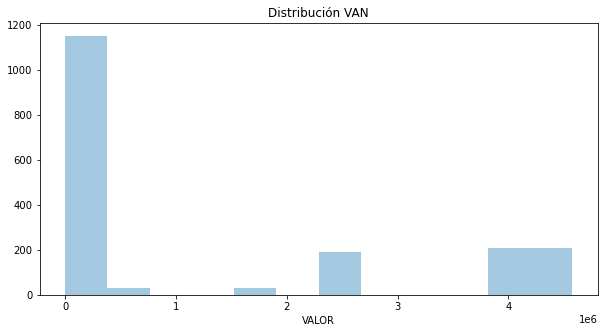

In [14]:
fig, ax = plt.subplots(figsize = (10,5))
sns.distplot(a = resData['VALOR'], hist = True, kde=False, ax=ax)
ax.set_title("Distribución VAN")

In [15]:
df_reset=resData.reset_index()


In [16]:
df_reset


,ELEMENTO,CONCEPTO,GRUPO,COEFICIENTE,VALOR,VALOR CALCULADO,IMPORTES TOTALES,MES 1,MES 2,MES 3,...,MES 84,MES 85,MES 86,MES 87,MES 88,MES 89,MES 90,MES 91,MES 92,iteracion
0,Informes previos,COSTES,COSTES PREVIOS,1.0000,5800.0,5800.00000,-5.800000e+03,0,-5800.0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
1,Topografia,COSTES,COSTES PREVIOS,1.0000,1200.0,1200.00000,-1.200000e+03,0,0.0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
2,Geotecnico,COSTES,COSTES PREVIOS,1.0000,4500.0,4500.00000,-4.500000e+03,0,0.0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
3,IVA,COSTES,COSTES PREVIOS,0.2100,11500.0,2415.00000,-2.415000e+03,0,-1218.0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
4,Proyecto demolición,COSTES,COSTES TECNICOS,0.0561,96887.7,5435.39997,-5.435400e+03,0,0.0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1819,TASA R ESTIMADA ANUAL,CALCULADOS,TASAS,0.0000,0.0,0.00000,6.000000e-02,0,0.0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,32
1820,TASA ESTIMADA MENSUAL,CALCULADOS,TASAS,0.0000,0.0,0.00000,4.867551e-03,0,0.0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,32
1821,TASA INTERES,CALCULADOS,TASAS,0.0000,0.0,0.00000,5.000000e-04,0,0.0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,32
1822,VAN PROYECTO,CALCULADOS,PROYECTO,0.0000,0.0,0.00000,1.270292e+06,0,0.0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,32


In [17]:
## Inputs
##dataAYUDAS88VIVIENDASAYTO= df_reset.loc[(df_reset['ELEMENTO'] == 'Ayudas a 88 viviendas Ayto')]
##dataAYUDAS88VIVIENDASDGA = df_reset.loc[(df_reset['ELEMENTO'] == 'Ayudas a 88 viviendas DGA')]

dataVentaViviendas = df_reset.loc[(df_reset['ELEMENTO'] == 'Venta 44 viviendas')]
dataAyudasViviendasAyto = df_reset.loc[(df_reset['ELEMENTO'] == 'Ayudas a 88 viviendas Ayto')]
dataAyudasViviendasDGA = df_reset.loc[(df_reset['ELEMENTO'] == 'Ayudas a 88 viviendas DGA')]
dataAlquilerViviendas = df_reset.loc[(df_reset['ELEMENTO'] == 'Alquiler 44 viviendas 5 años')]
dataCapitalizacionEnergia = df_reset.loc[(df_reset['ELEMENTO'] == 'Capitalizacion ahorro energetico')]


In [18]:
## Outputs
dataVAN = df_reset.loc[(df_reset['ELEMENTO'] == 'VAN PROYECTO')]
dataTIRM = df_reset.loc[(df_reset['ELEMENTO'] == 'TIRM PROYECTO')]
dataMARGEN = df_reset.loc[(df_reset['ELEMENTO'] == 'MARGEN ')]

In [19]:
##fig, ax = plt.subplots(figsize = (10,5))
##sns.distplot(a = dataVAN['IMPORTES TOTALES'], hist = True, kde=False, ax=ax)
##ax.set_title("Distribución VAN")

In [20]:
##sns.displot(dataVAN, x="IMPORTES TOTALES", height=7, stat = 'density')

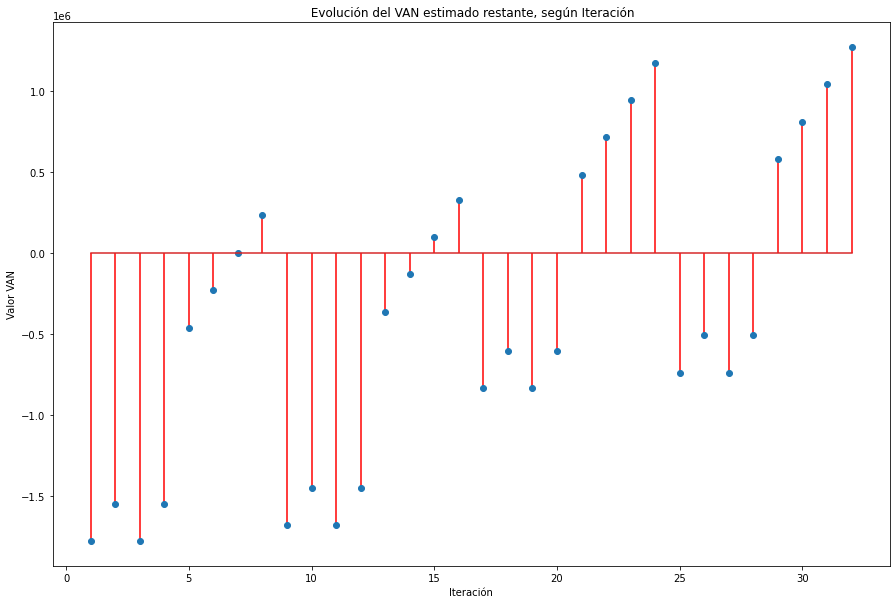

In [21]:
    titulo=' Evolución del VAN estimado restante, según Iteración'
    plt.subplots(figsize = (15, 10))
    plt.stem(dataVAN['iteracion'], dataVAN['IMPORTES TOTALES'], "r-")
    plt.title(titulo)
    plt.xlabel('Iteración')
    plt.ylabel('Valor VAN')
    plt.show()

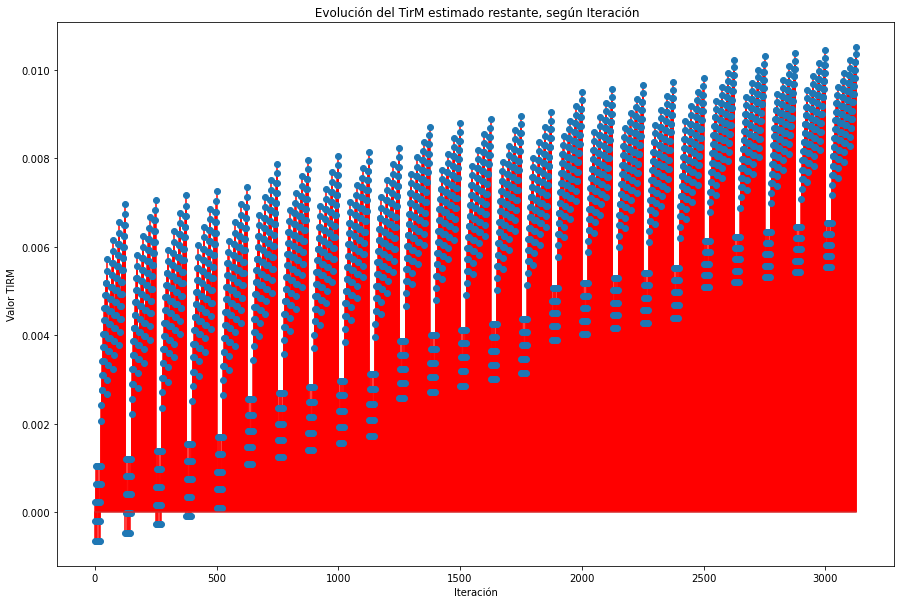

In [22]:
    titulo=' Evolución del TirM estimado restante, según Iteración'
    plt.subplots(figsize = (15, 10))
    plt.stem(dataTIRM['iteracion'], dataTIRM['IMPORTES TOTALES'], "r-")
    plt.title(titulo)
    plt.xlabel('Iteración')
    plt.ylabel('Valor TIRM')
    plt.show()


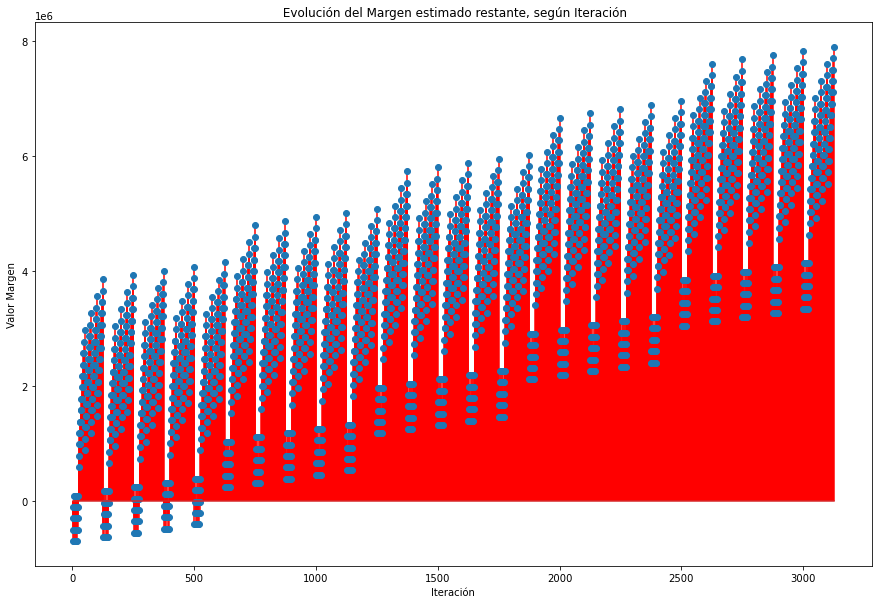

In [23]:
    titulo=' Evolución del Margen estimado restante, según Iteración'
    plt.subplots(figsize = (15, 10))
    plt.stem(dataMARGEN['iteracion'], dataMARGEN['IMPORTES TOTALES'], "r-")
    plt.title(titulo)
    plt.xlabel('Iteración')
    plt.ylabel('Valor Margen')
    plt.show()

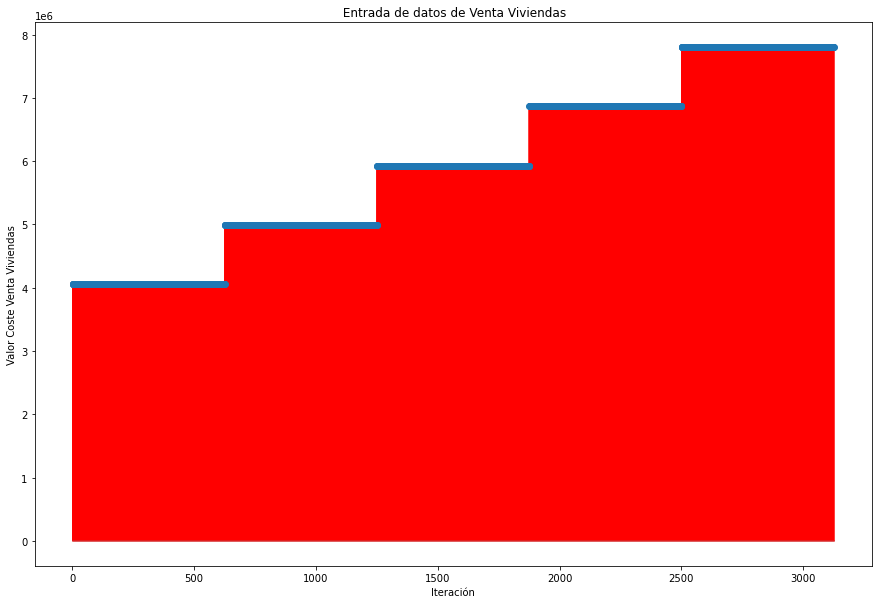

In [24]:
titulo=' Entrada de datos de Venta Viviendas'
plt.subplots(figsize = (15, 10))
plt.stem(dataVentaViviendas['iteracion'], dataVentaViviendas['IMPORTES TOTALES'], "r-")
plt.title(titulo)
plt.xlabel('Iteración')
plt.ylabel('Valor Coste Venta Viviendas')
plt.show()


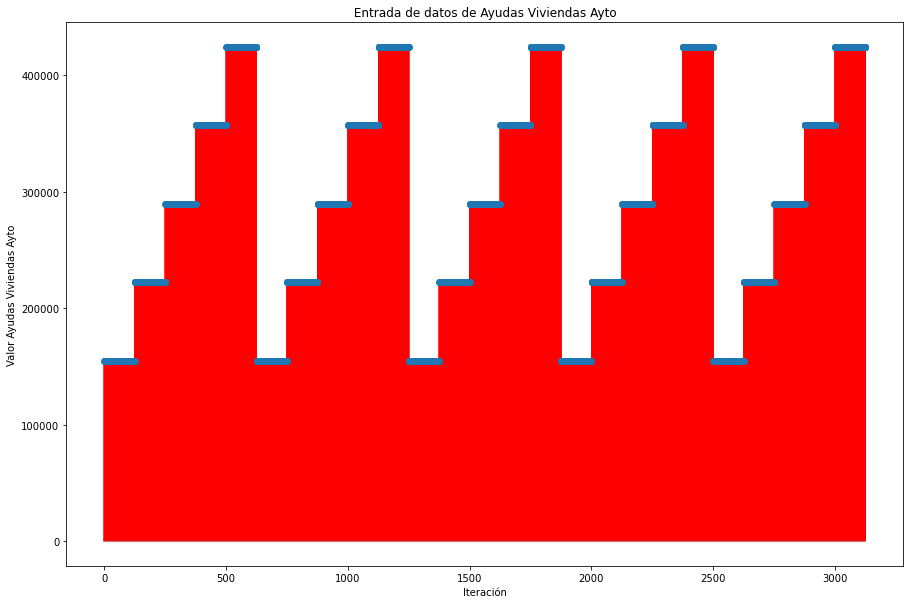

In [25]:
titulo=' Entrada de datos de Ayudas Viviendas Ayto '
plt.subplots(figsize = (15, 10))
plt.stem(dataAyudasViviendasAyto['iteracion'], dataAyudasViviendasAyto['IMPORTES TOTALES'], "r-")
plt.title(titulo)
plt.xlabel('Iteración')
plt.ylabel('Valor Ayudas Viviendas Ayto')
plt.show()

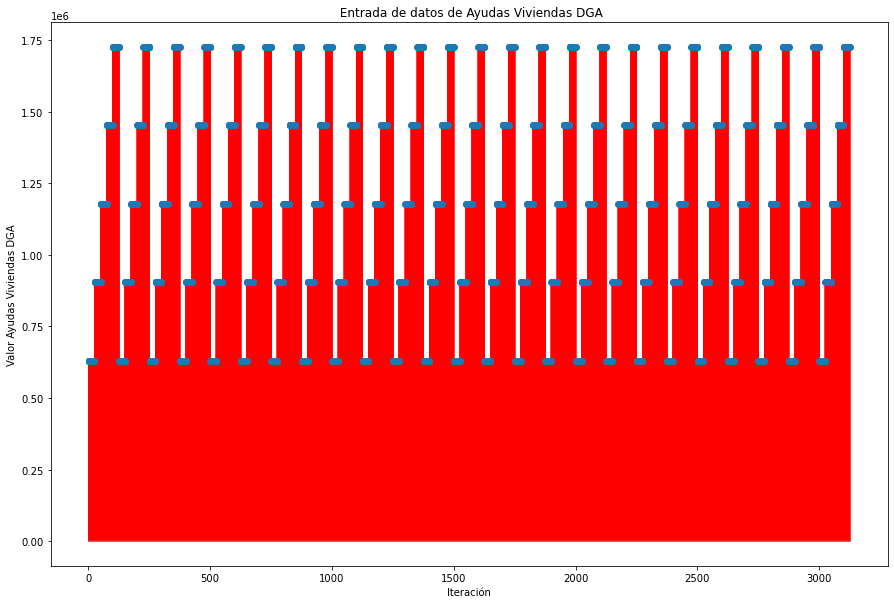

In [26]:
titulo=' Entrada de datos de Ayudas Viviendas DGA'
plt.subplots(figsize = (15, 10))
plt.stem(dataAyudasViviendasDGA['iteracion'], dataAyudasViviendasDGA['IMPORTES TOTALES'], "r-")
plt.title(titulo)
plt.xlabel('Iteración')
plt.ylabel('Valor Ayudas Viviendas DGA')
plt.show()


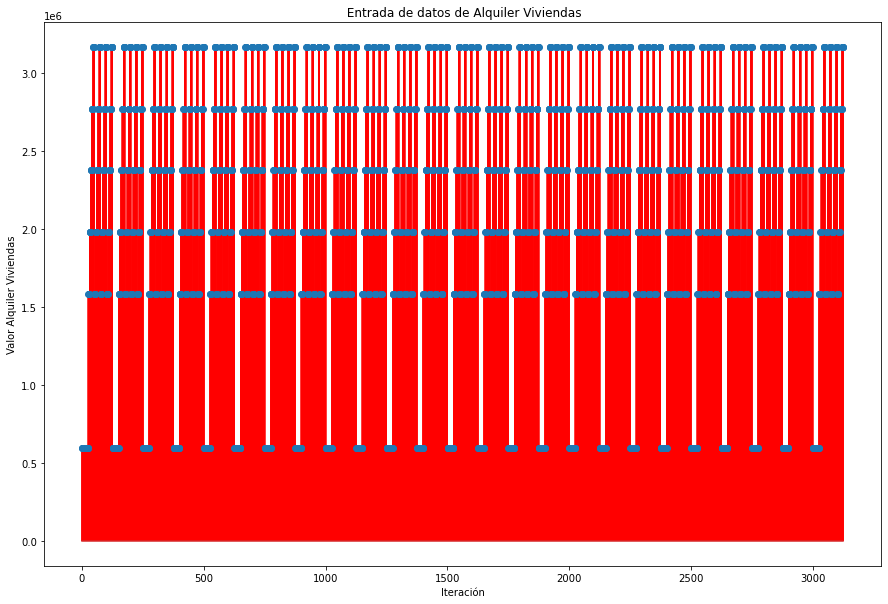

In [27]:
titulo=' Entrada de datos de Alquiler Viviendas'
plt.subplots(figsize = (15, 10))
plt.stem(dataAlquilerViviendas['iteracion'], dataAlquilerViviendas['IMPORTES TOTALES'], "r-")
plt.title(titulo)
plt.xlabel('Iteración')
plt.ylabel('Valor Alquiler Viviendas')
plt.show()


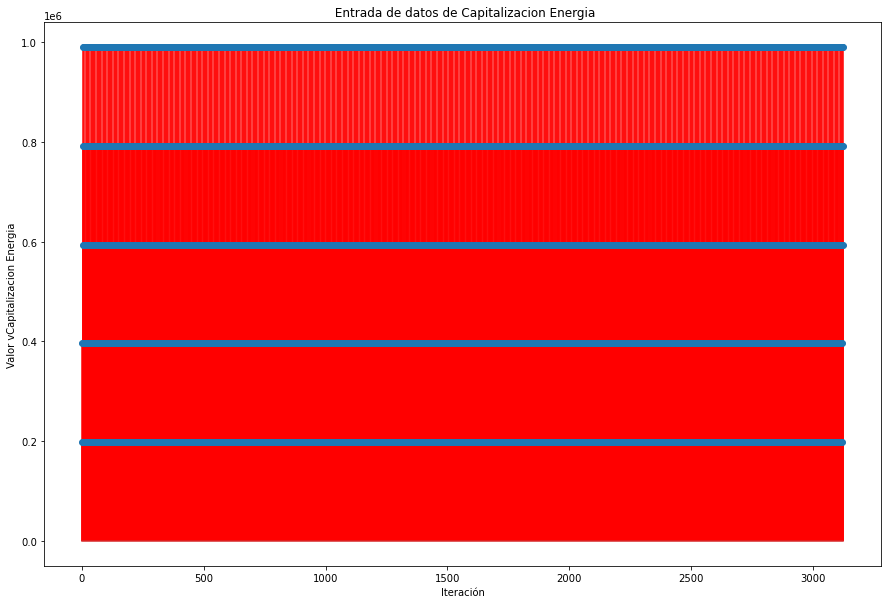

In [29]:
titulo=' Entrada de datos de Capitalizacion Energia'
plt.subplots(figsize = (15, 10))
plt.stem(dataCapitalizacionEnergia['iteracion'], dataCapitalizacionEnergia['IMPORTES TOTALES'], "r-")
plt.title(titulo)
plt.xlabel('Iteración')
plt.ylabel('Valor vCapitalizacion Energia')
plt.show()